<a href="https://colab.research.google.com/github/khairooo/Data-visaulisation-/blob/main/Data_preprocessing_and_Visualizations_checkpoint3(inst).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [345]:
#  loading packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [346]:
# read the data as csv dataframe 
df = pd.read_csv("/content/titanic-passengers.csv",sep = ";")
# The first 5 rows 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Exploratory Data Analysis 
One of the most important part is the EDA (exploratory Data Analysis ) 
In this part we have only view and verify the data without making changes 
- we can often add some visualization like 
- here we can devide this part in two main parts 
-- Univariate: Exploration of each column **feature** alone 
-- Bivariate and Multivariate Exploration of **Column vs column**, **column vs columns**

In [347]:
# The 5th last rows of df 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [348]:
# Informations about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [349]:
# Columns of the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [350]:
# number of rows and columns using shape attribute 
df.shape

(891, 12)

In [351]:
#statistical description 
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [352]:
# The sum() of the null values exist in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Univariate part : 
- We kickstart with Survived column (Target)
I will explore only one or two columns you can use as many as you like 

In [353]:
# Count of the yes ad no in the Survived column 
surviv = df.Survived.value_counts()
surviv

No     549
Yes    342
Name: Survived, dtype: int64

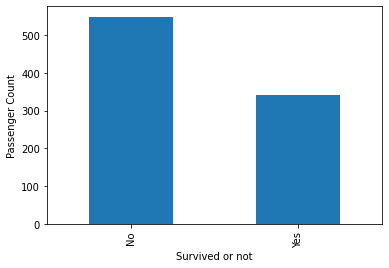

In [354]:
"""#pandas 0.17.0 and above
s.plot.bar()
#pandas below 0.17.0
s.plot('bar')"""
plt = df["Survived"].value_counts().plot.bar();
plt.set_xlabel('Survived or not');
plt.set_ylabel('Passenger Count');

Text(0, 0.5, 'Survival Probability')

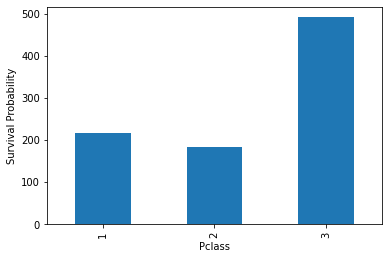

In [355]:
# Pclass column exploration
"""#pandas 0.17.0 and above
s.plot.bar()
#pandas below 0.17.0
s.plot('bar')"""
plt = df.Pclass.value_counts().sort_index().plot.bar()
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

## BI-multivariate part:


### **Pclass VS Survived **

In [356]:
pclass_surv = df[['Pclass', 'Survived']].groupby('Pclass').count()

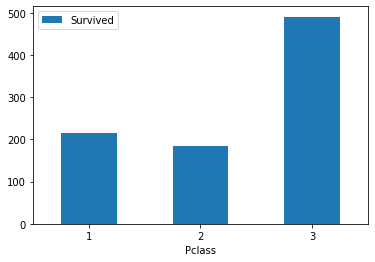

In [357]:
pclass_surv.plot.bar(rot=0)


### **Sex VS Survived **

In [358]:
sex_surv = df[['Sex', 'Survived']].groupby('Sex').count()

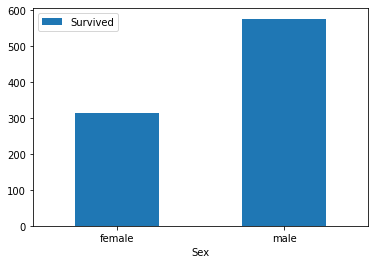

In [359]:
sex_surv.plot.bar(rot=0);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


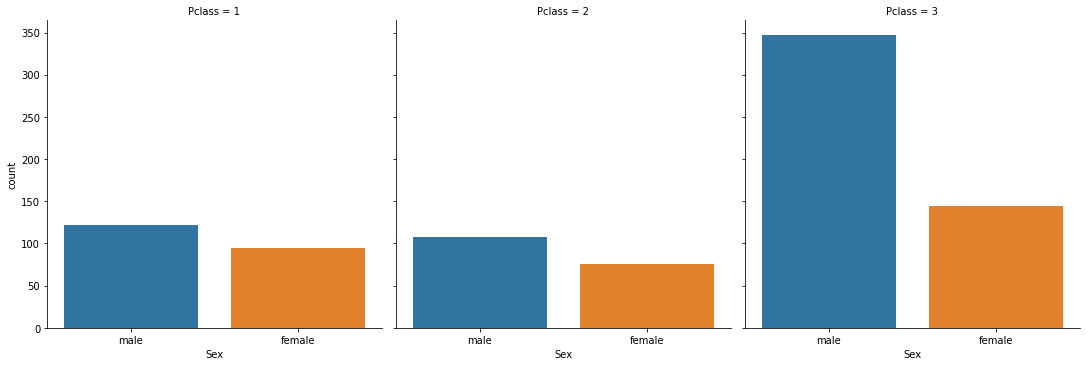

In [360]:
sns.factorplot('Sex', col = 'Pclass', data = df, kind = 'count');

In [361]:
# The correlation of df 
"""def plot_correlation_map( dataframe):

    corr = dataframe.corr()

    s,ax = plt.subplots()

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)"""
# You can create your heatmap by the code above or only using plot_correlation_map(df)

"def plot_correlation_map( dataframe):\n\n    corr = dataframe.corr()\n\n    s,ax = plt.subplots()\n\n    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )\n\n    s = sns.heatmap(\n\n        corr, \n\n        cmap = cmap,\n\n        square=True, \n\n        cbar_kws={ 'shrink' : .9 }, \n\n        ax=ax, \n\n        annot = True, \n\n        annot_kws = { 'fontsize' : 12 }\n\n        )\nplot_correlation_map(df)"

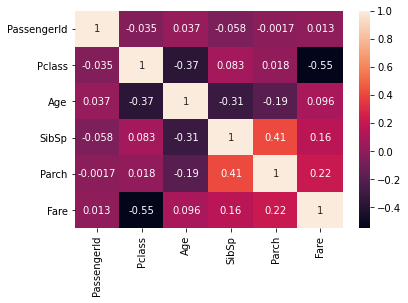

In [362]:
sns.heatmap(df.corr(),annot = True)

# Data Preprocessing: 
The part of manipulation 
The machine learning model is supposed to predict who survived during the titanic shipwreck.

Here I will show you how to apply preprocessing techniques on the Titanic dataset.

@ Why do we need Preprocessing ?
- For machine learning algorithms to work, it is necessary to convert the raw data into a clean data set and dataset must be converted to numeric data. You have to encode all the categorical lables to column vectors with binary values.  Missing values or NaNs in the dataset is an annoying problem. You have to either drop the missing rows or fill them up with a mean or interpolated  values..


In [363]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

If you carefully observe the above summary of pandas, there are total 891 rows, Age shows only 714 (means missing), Embarked (2 missing) and Cabin missing a lot as well. Object data types are non-numeric so we have to find a way to encode them to numerical values.

### - Dropping Columns which are not useful
Lets try to drop some of the columns which many not contribute much to our machine learning model such as Ticket, Cabin etc.

In [364]:
cols = ['Ticket', 'Cabin']
df = df.drop(cols, axis=1)

Problem with dropping rows having missing values
After dropping rows with missing values we find that the dataset is reduced to 712 rows from 891, which means we are wasting data. Machine learning models need data for training to perform well. So we preserve the data and make use of it as much as we can. We will see it later.

_________________________________________________________

Creating Dummy Variables
Now we convert the Pclass, Sex, Embarked to columns in pandas and drop them after conversion.

In [365]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))
  

In [366]:
titanic_dummies = pd.concat(dummies, axis=1)

In [367]:
titanic_dummies.head()

,1,2,3,female,male,C,Q,S
0,0,1,0,0,1,0,0,1
1,0,0,1,0,1,0,0,1
2,0,0,1,0,1,0,0,1
3,0,0,1,1,0,0,0,1
4,1,0,0,0,1,0,0,1


We have 8 columns transformed to columns. 1,2,3 represents passenger class.

In [368]:
# finally we concatenate to the original dataframe columnwise
df = pd.concat((df,titanic_dummies), axis=1)

Now that we converted Pclass, Sex, Embarked values into columns, we drop the redundant same columns from the dataframe

In [369]:
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Name         891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   1            891 non-null    uint8  
 8   2            891 non-null    uint8  
 9   3            891 non-null    uint8  
 10  female       891 non-null    uint8  
 11  male         891 non-null    uint8  
 12  C            891 non-null    uint8  
 13  Q            891 non-null    uint8  
 14  S            891 non-null    uint8  
dtypes: float64(2), int64(3), object(2), uint8(8)
memory usage: 55.8+ KB


- Taking Care of Missing Data

---

---









All is good, except age which has lots of missing values. Lets compute a median or interpolate() all the ages and fill those missing age values. Pandas has a interpolate() function that will replace all the missing NaNs to interpolated values.

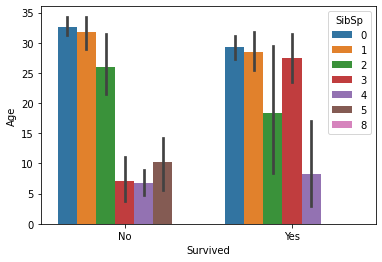

In [371]:

sns.barplot(x='Survived',y='Age',data=df,hue='SibSp')

- Let's use the dictionary below to replace and unifying (minimizing), the titles 

In [372]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [373]:
def get_titles():
    # we extract the title from each name
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    df['Title'] = df.Title.map(Title_Dictionary)
    return df

- Here Our objrctive is to create a new column Title with the titlesa of each person 

In [374]:
df = get_titles()
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,Title
0,343,No,"Collander, Mr. Erik Gustaf",28.0,0,0,13.0000,0,1,0,0,1,0,0,1,Mrs
1,76,No,"Moen, Mr. Sigurd Hansen",25.0,0,0,7.6500,0,0,1,0,1,0,0,1,Mrs
2,641,No,"Jensen, Mr. Hans Peder",20.0,0,0,7.8542,0,0,1,0,1,0,0,1,Mrs
3,568,No,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,0,4,21.0750,0,0,1,1,0,0,0,1,Mrs
4,672,No,"Davidson, Mr. Thornton",31.0,1,0,52.0000,1,0,0,0,1,0,0,1,Mrs


- Let’s check if the titles have been filled correctly.

In [375]:
df[df['Title'].isnull()]

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,Title


In [376]:
df['Statut'] = df['Title'].map(Title_Dictionary,df["Title"],) 
df.head(10)

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,Title,Statut
0,343,No,"Collander, Mr. Erik Gustaf",28.0,0,0,13.0000,0,1,0,0,1,0,0,1,Mrs,Mrs
1,76,No,"Moen, Mr. Sigurd Hansen",25.0,0,0,7.6500,0,0,1,0,1,0,0,1,Mrs,Mrs
2,641,No,"Jensen, Mr. Hans Peder",20.0,0,0,7.8542,0,0,1,0,1,0,0,1,Mrs,Mrs
3,568,No,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,0,4,21.0750,0,0,1,1,0,0,0,1,Mrs,Mrs
4,672,No,"Davidson, Mr. Thornton",31.0,1,0,52.0000,1,0,0,0,1,0,0,1,Mrs,Mrs
5,105,No,"Gustafsson, Mr. Anders Vilhelm",37.0,2,0,7.9250,0,0,1,0,1,0,0,1,Mrs,Mrs
6,576,No,"Patchett, Mr. George",19.0,0,0,14.5000,0,0,1,0,1,0,0,1,Mrs,Mrs
7,382,Yes,"Nakid, Miss. Maria (""Mary"")",1.0,0,2,15.7417,0,0,1,1,0,1,0,0,Miss,Miss
8,228,No,"Lovell, Mr. John Hall (""Henry"")",20.5,0,0,7.2500,0,0,1,0,1,0,0,1,Mrs,Mrs
9,433,Yes,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",42.0,1,0,26.0000,0,1,0,1,0,0,0,1,Mrs,Mrs


In [377]:
df["Survived"]= df["Survived"].map({"No" : 0, "Yes":1})

In [378]:
df["FamilySize"]=df['Parch'] +df['SibSp']
df.drop(["SibSp","Parch"],axis=1,inplace=True)
                         
df.head()

,PassengerId,Survived,Name,Age,Fare,1,2,3,female,male,C,Q,S,Title,Statut,FamilySize
0,343,0,"Collander, Mr. Erik Gustaf",28.0,13.0000,0,1,0,0,1,0,0,1,Mrs,Mrs,0
1,76,0,"Moen, Mr. Sigurd Hansen",25.0,7.6500,0,0,1,0,1,0,0,1,Mrs,Mrs,0
2,641,0,"Jensen, Mr. Hans Peder",20.0,7.8542,0,0,1,0,1,0,0,1,Mrs,Mrs,0
3,568,0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,21.0750,0,0,1,1,0,0,0,1,Mrs,Mrs,4
4,672,0,"Davidson, Mr. Thornton",31.0,52.0000,1,0,0,0,1,0,0,1,Mrs,Mrs,1


- For further Information check out the link :
https://pub.towardsai.net/titanic-challenge-machine-learning-for-disaster-recovery-part-2-22561e8137f4 